In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("imacs-pothole-detection-wo8mu").project("pothole-detection-irkz9")
dataset = project.version(4).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 10.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e0f7db212e9c625a1f7ba8106f8d764f6782b4311863f196eab51e80ba98ddf3
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Pothole-Detection-4 in yolov8:: 100%|██████████| 192/192 [00:00<00:00, 1449.41it/s]


In [2]:
!pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from ultralytics import YOLO 
model = YOLO('yolov8n-seg.pt')

  0%|          | 0.00/6.74M [00:00<?, ?B/s]

In [4]:
model.train(data= '/content/Pothole-Detection-4/data.yaml',epochs = 3)

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=/content/Pothole-Detection-4/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr

In [5]:
model.val()

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CPU
Fusing layers... 
YOLOv8n-seg summary: 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/Pothole-Detection-4/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]
                   all          5          5    0.00333          1     0.0944     0.0788    0.00333          1     0.0947     0.0534
Speed: 2.0ms pre-process, 552.1ms inference, 0.0ms loss, 6.5ms post-process per image


In [6]:
from PIL import Image
pred_image = Image.open('/content/runs/segment/val/val_batch0_pred.jpg')
labels_pred = Image.open('/content/runs/segment/val/val_batch0_labels.jpg')

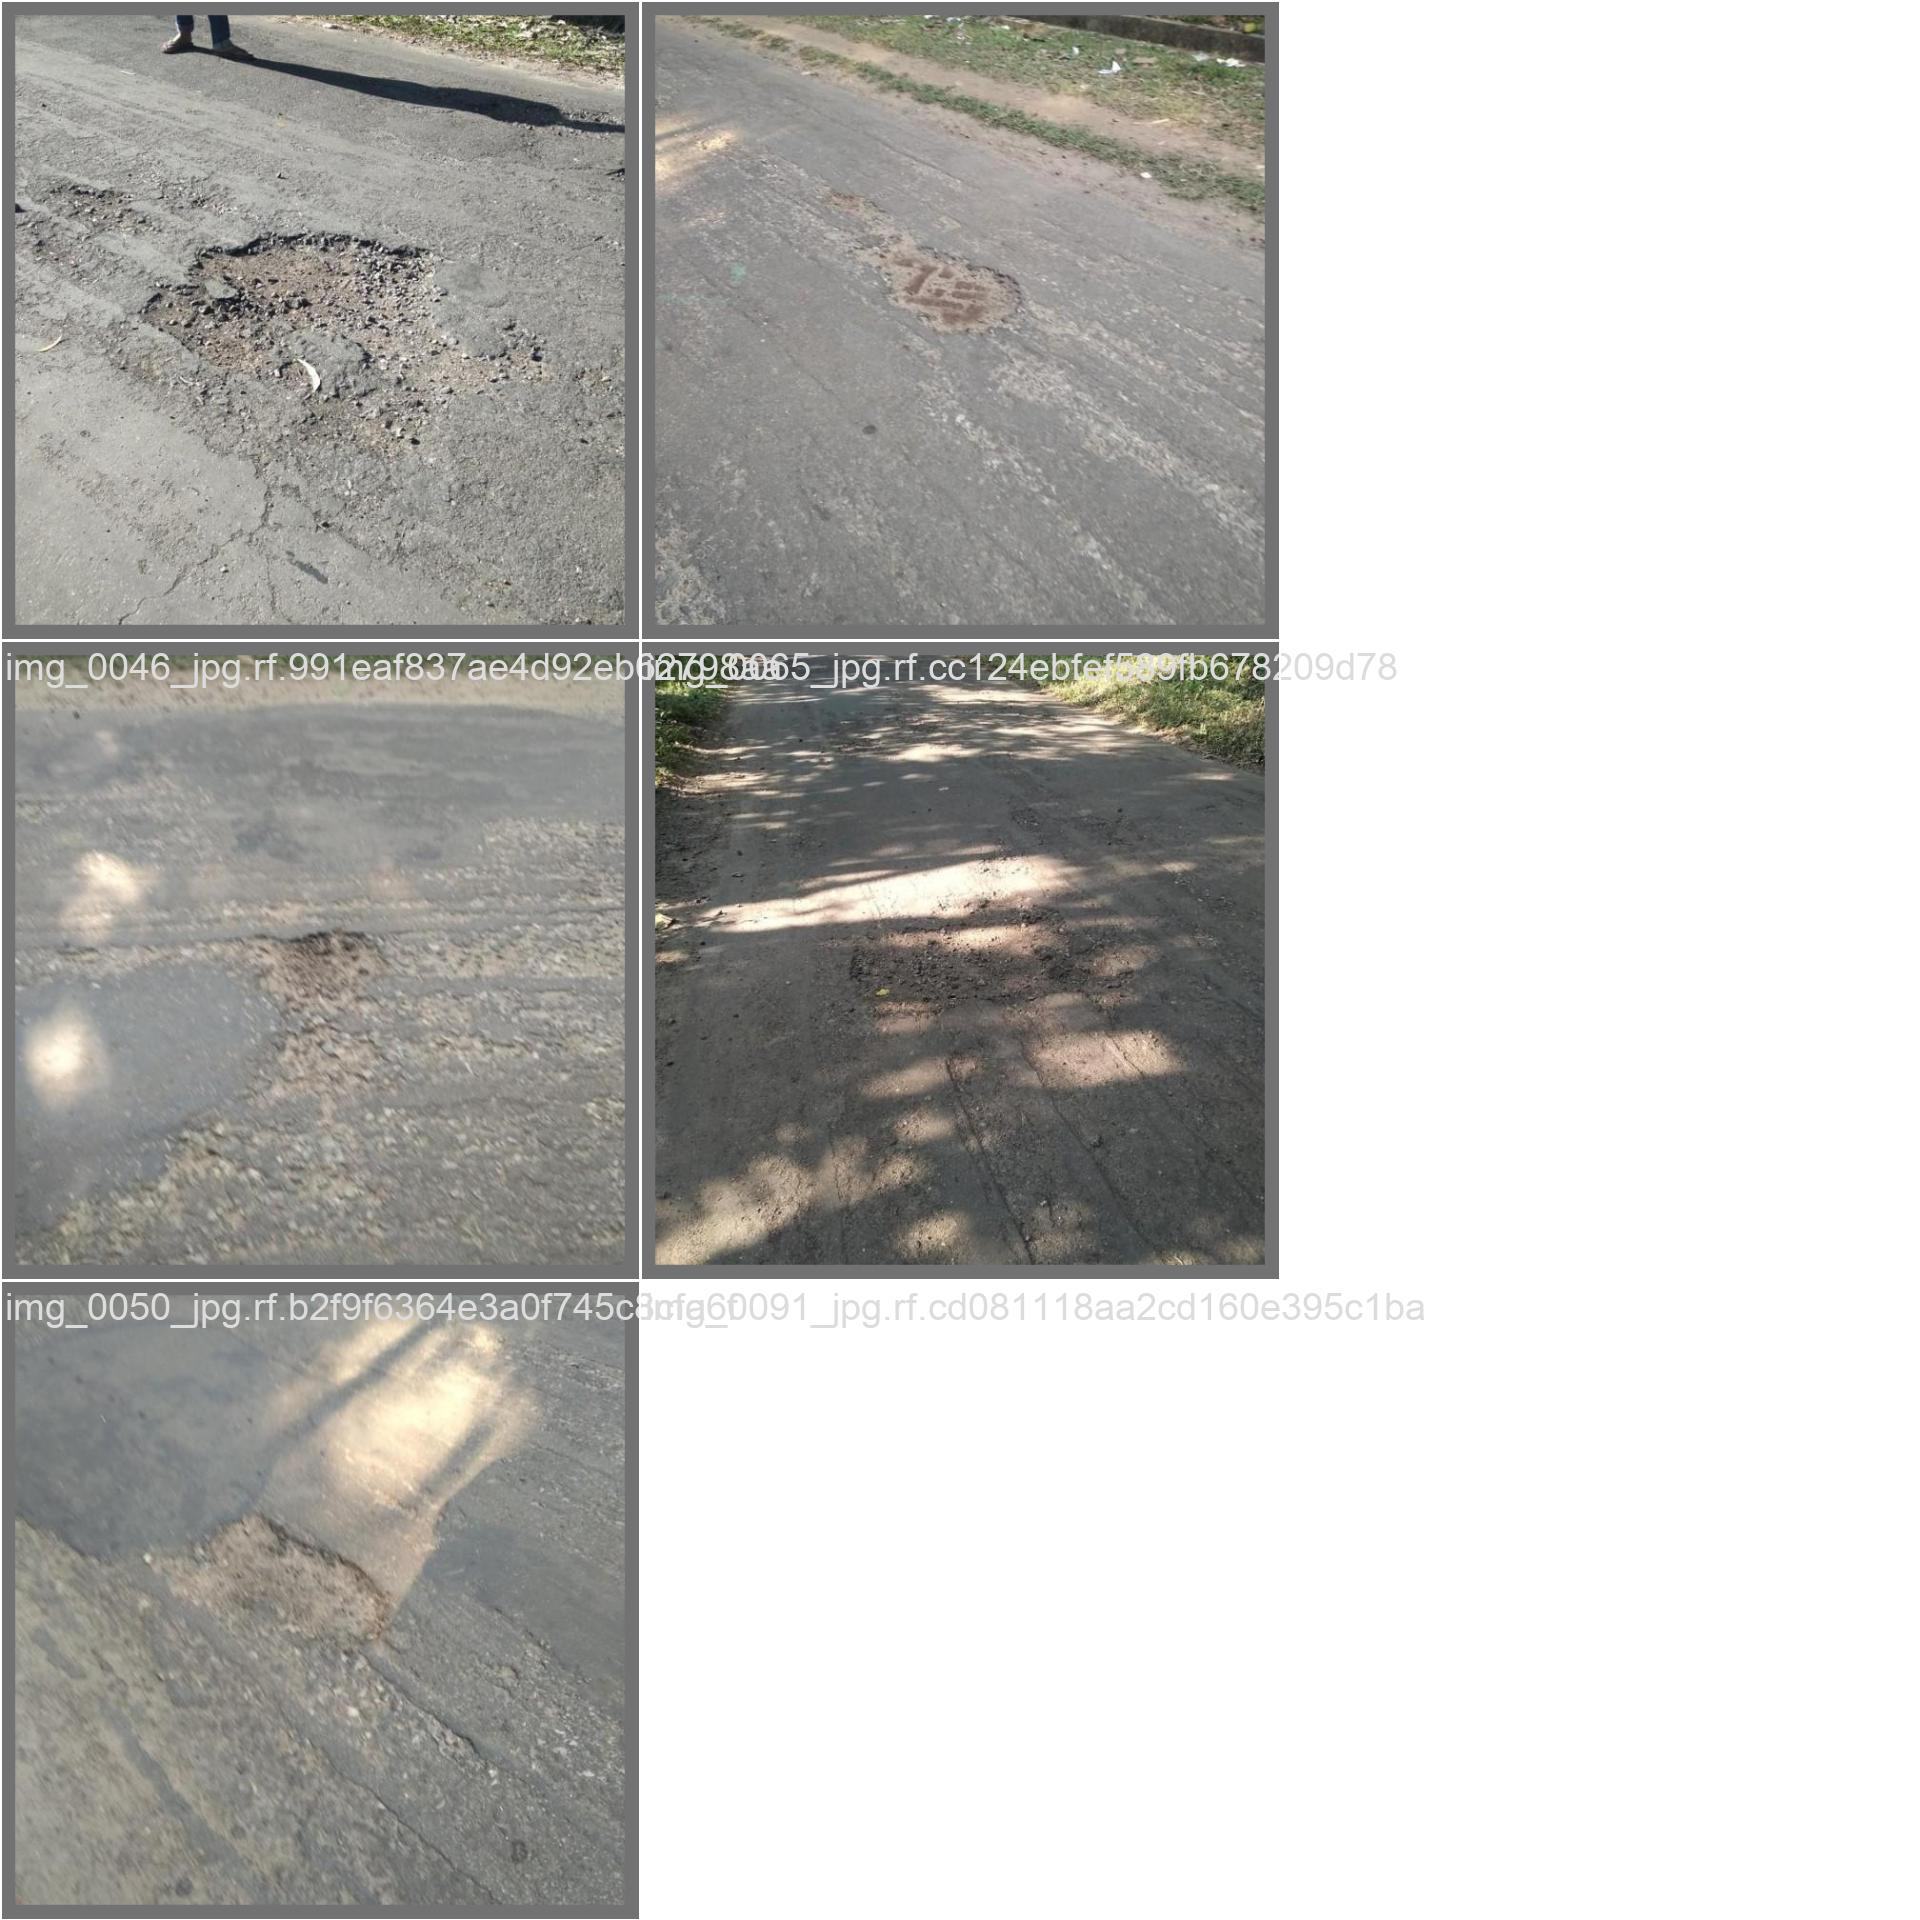

In [7]:
display(pred_image)

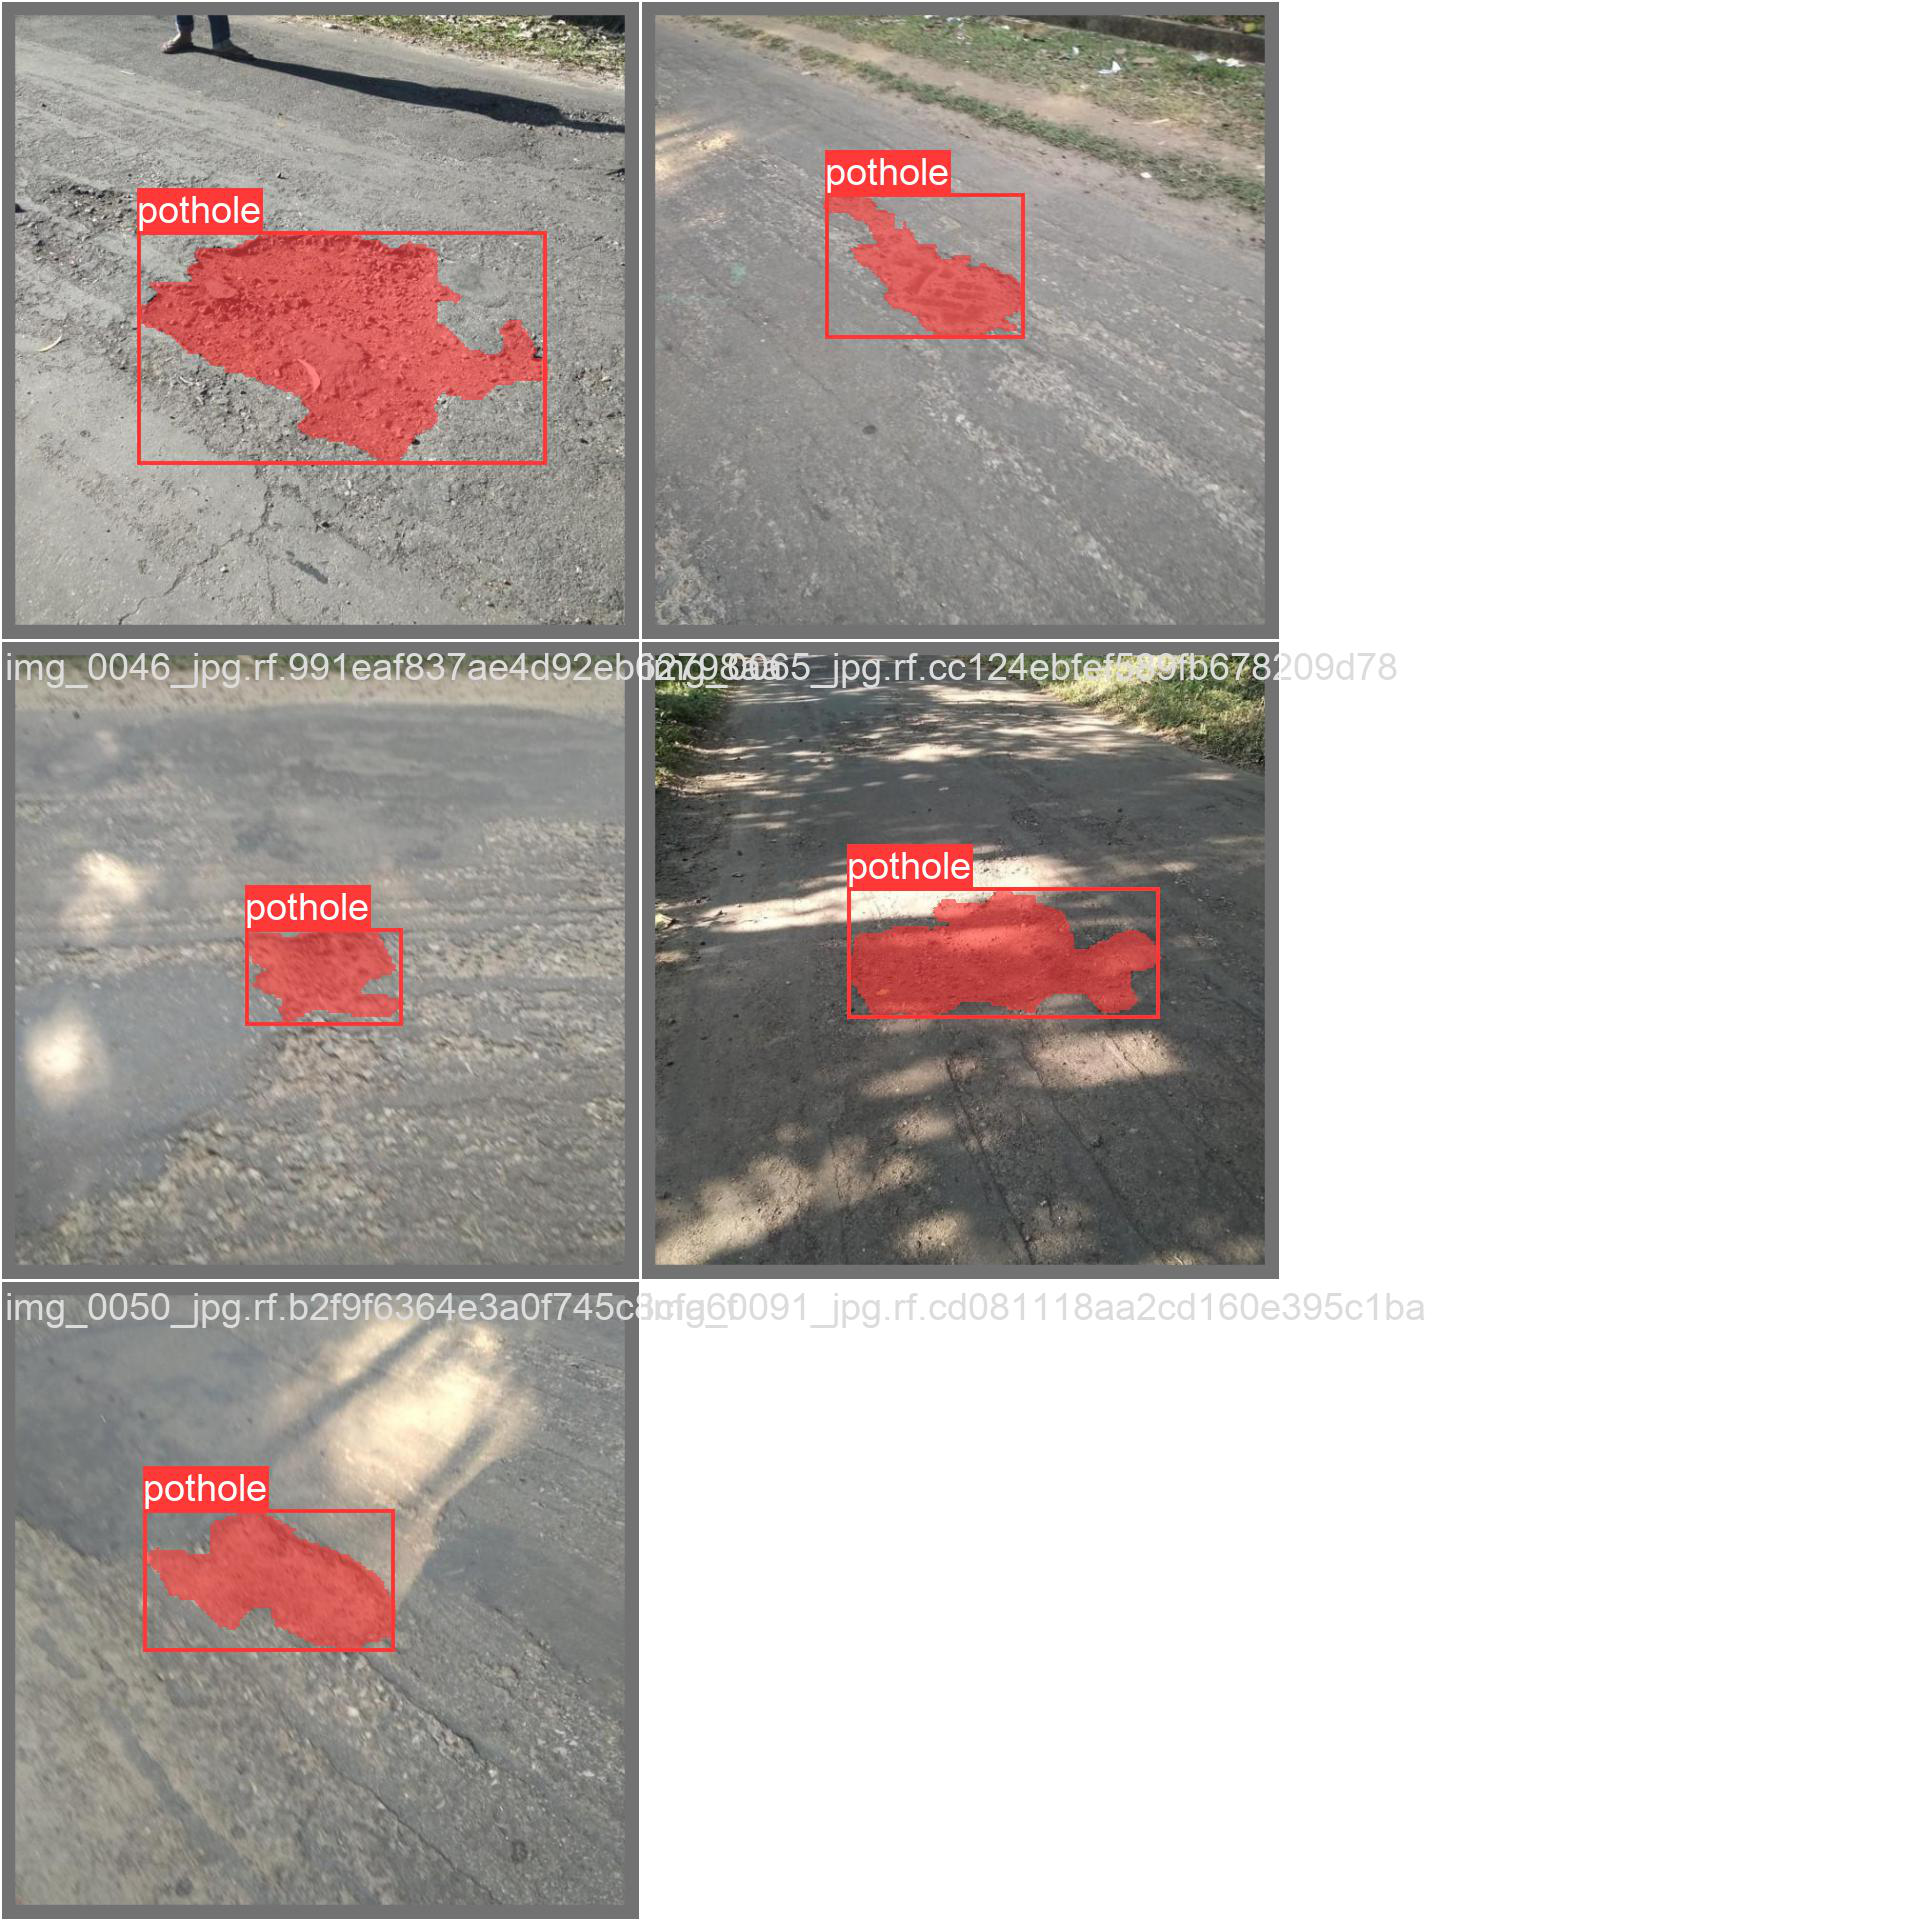

In [8]:
display(labels_pred)

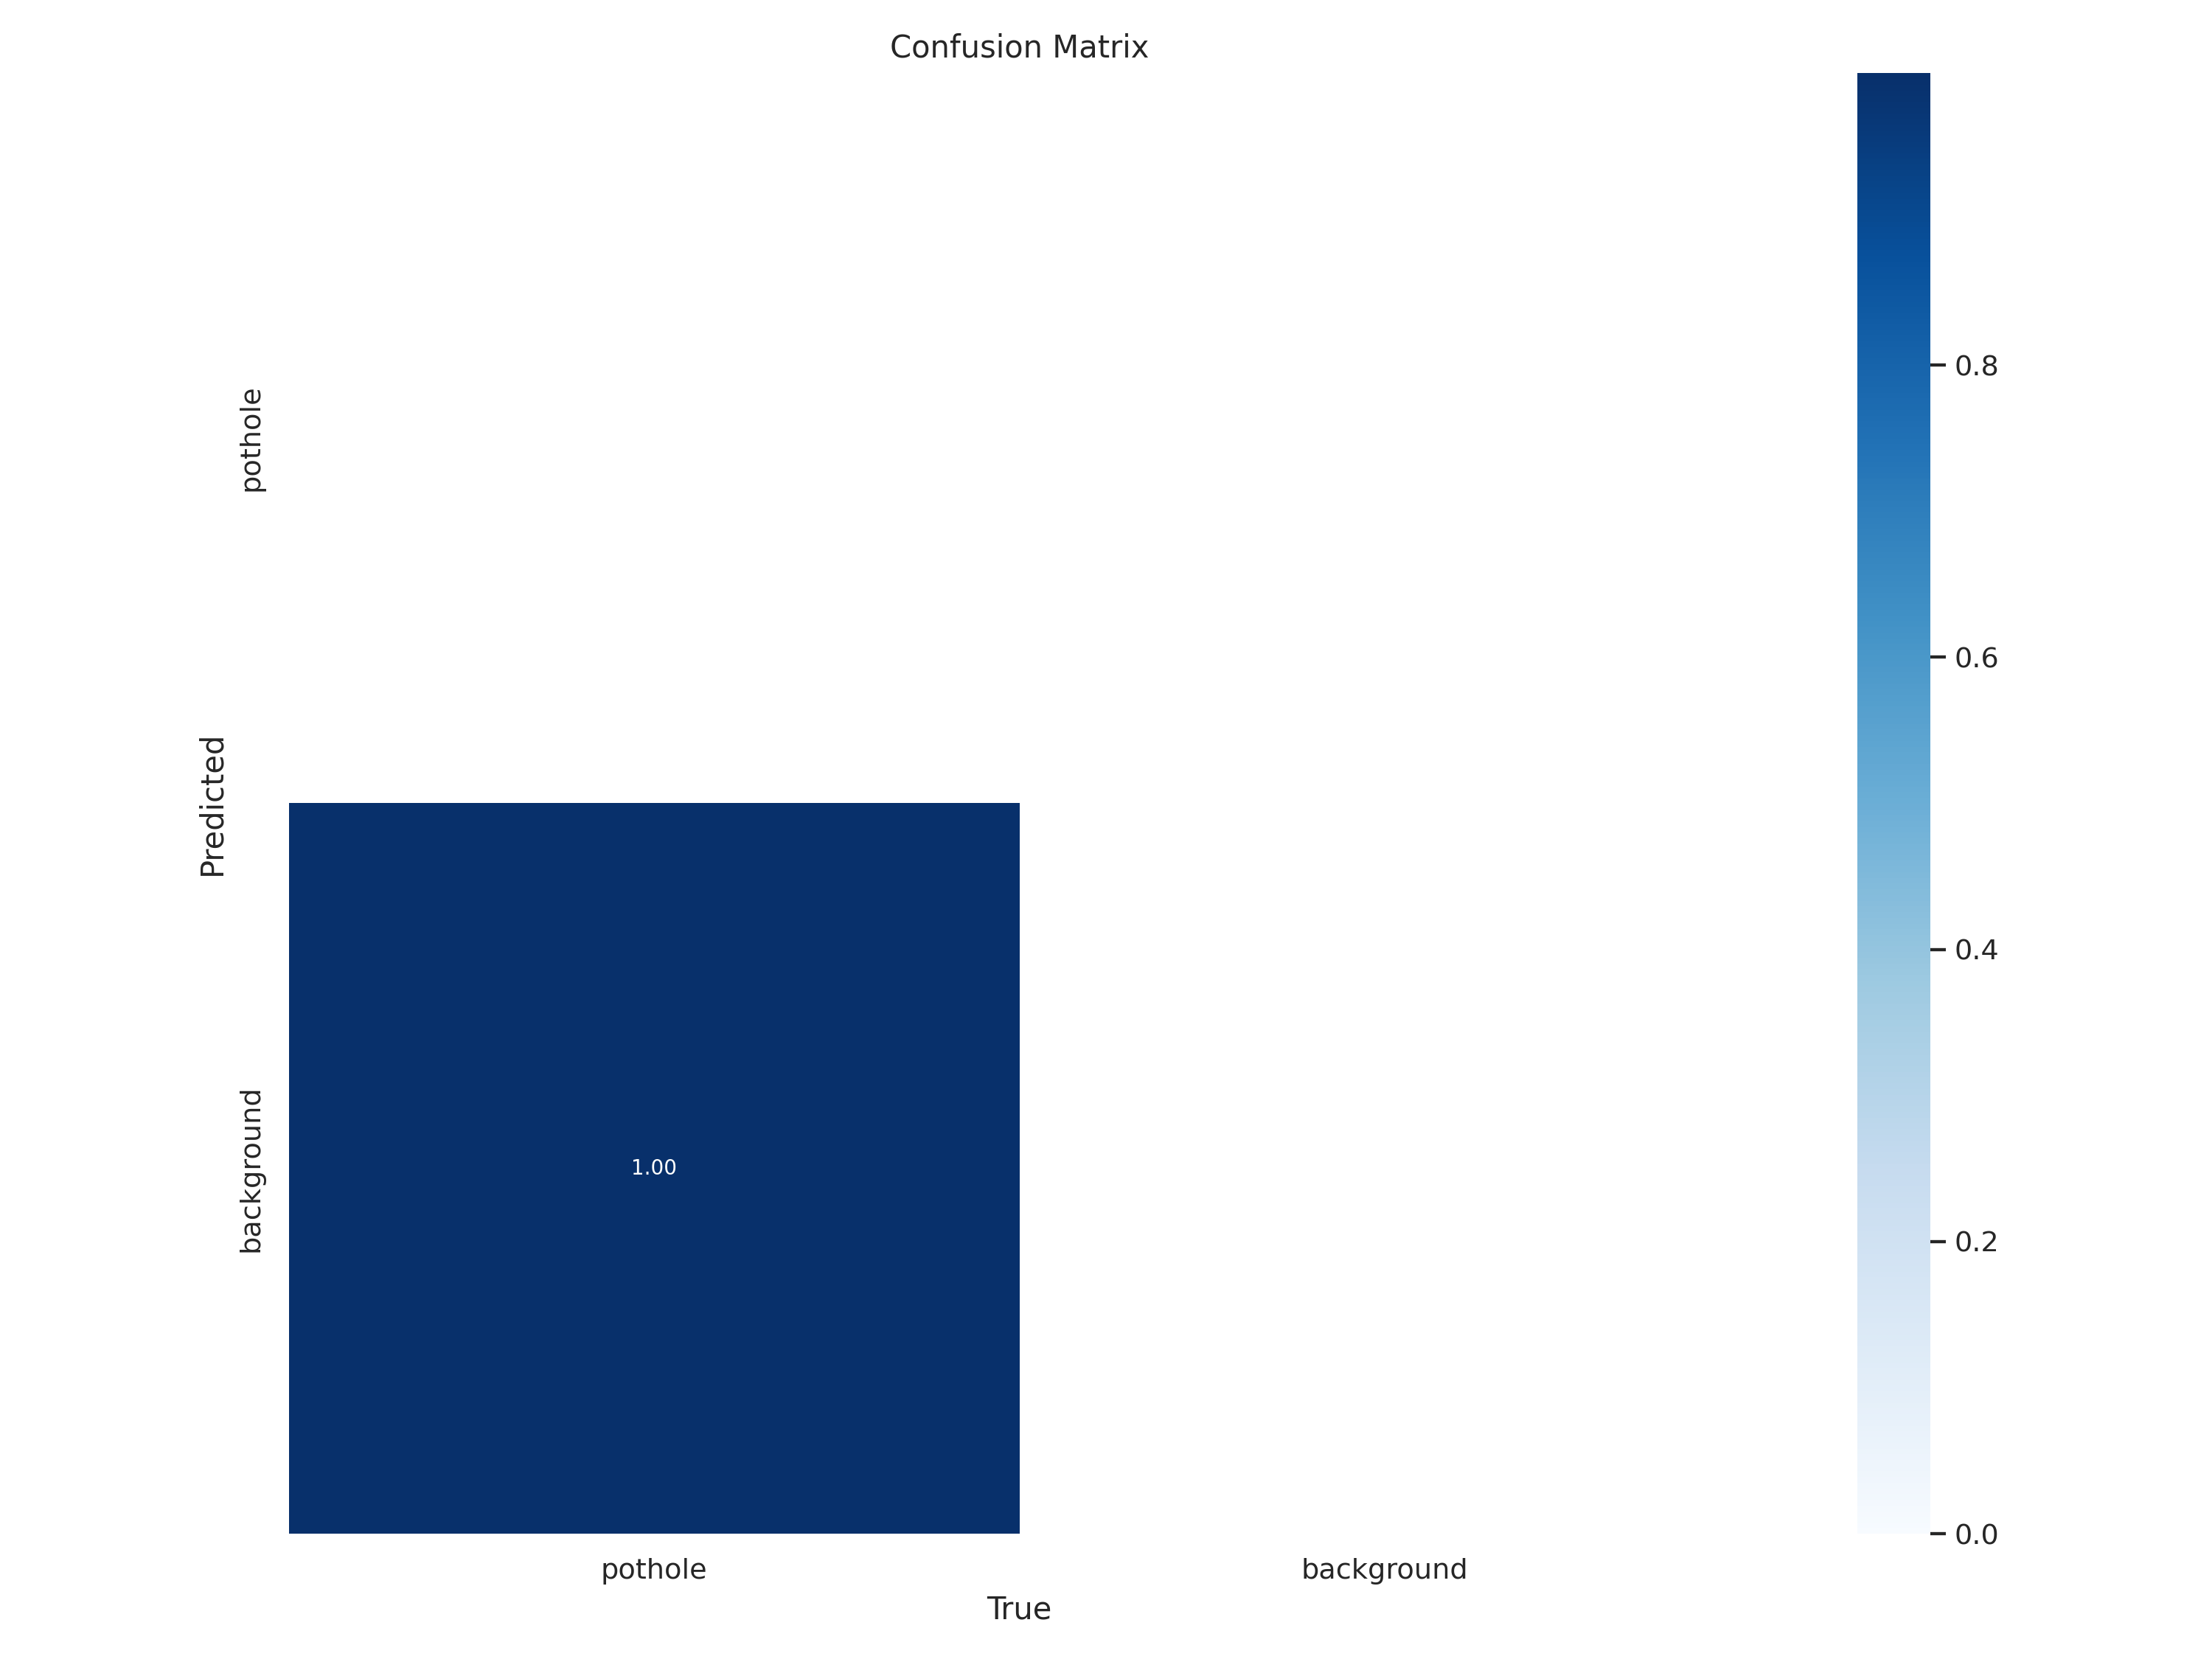

In [9]:
confusion_matrix = Image.open('/content/runs/segment/val/confusion_matrix.png')
train_result = Image.open('/content/runs/segment/train/results.png')
display(confusion_matrix)

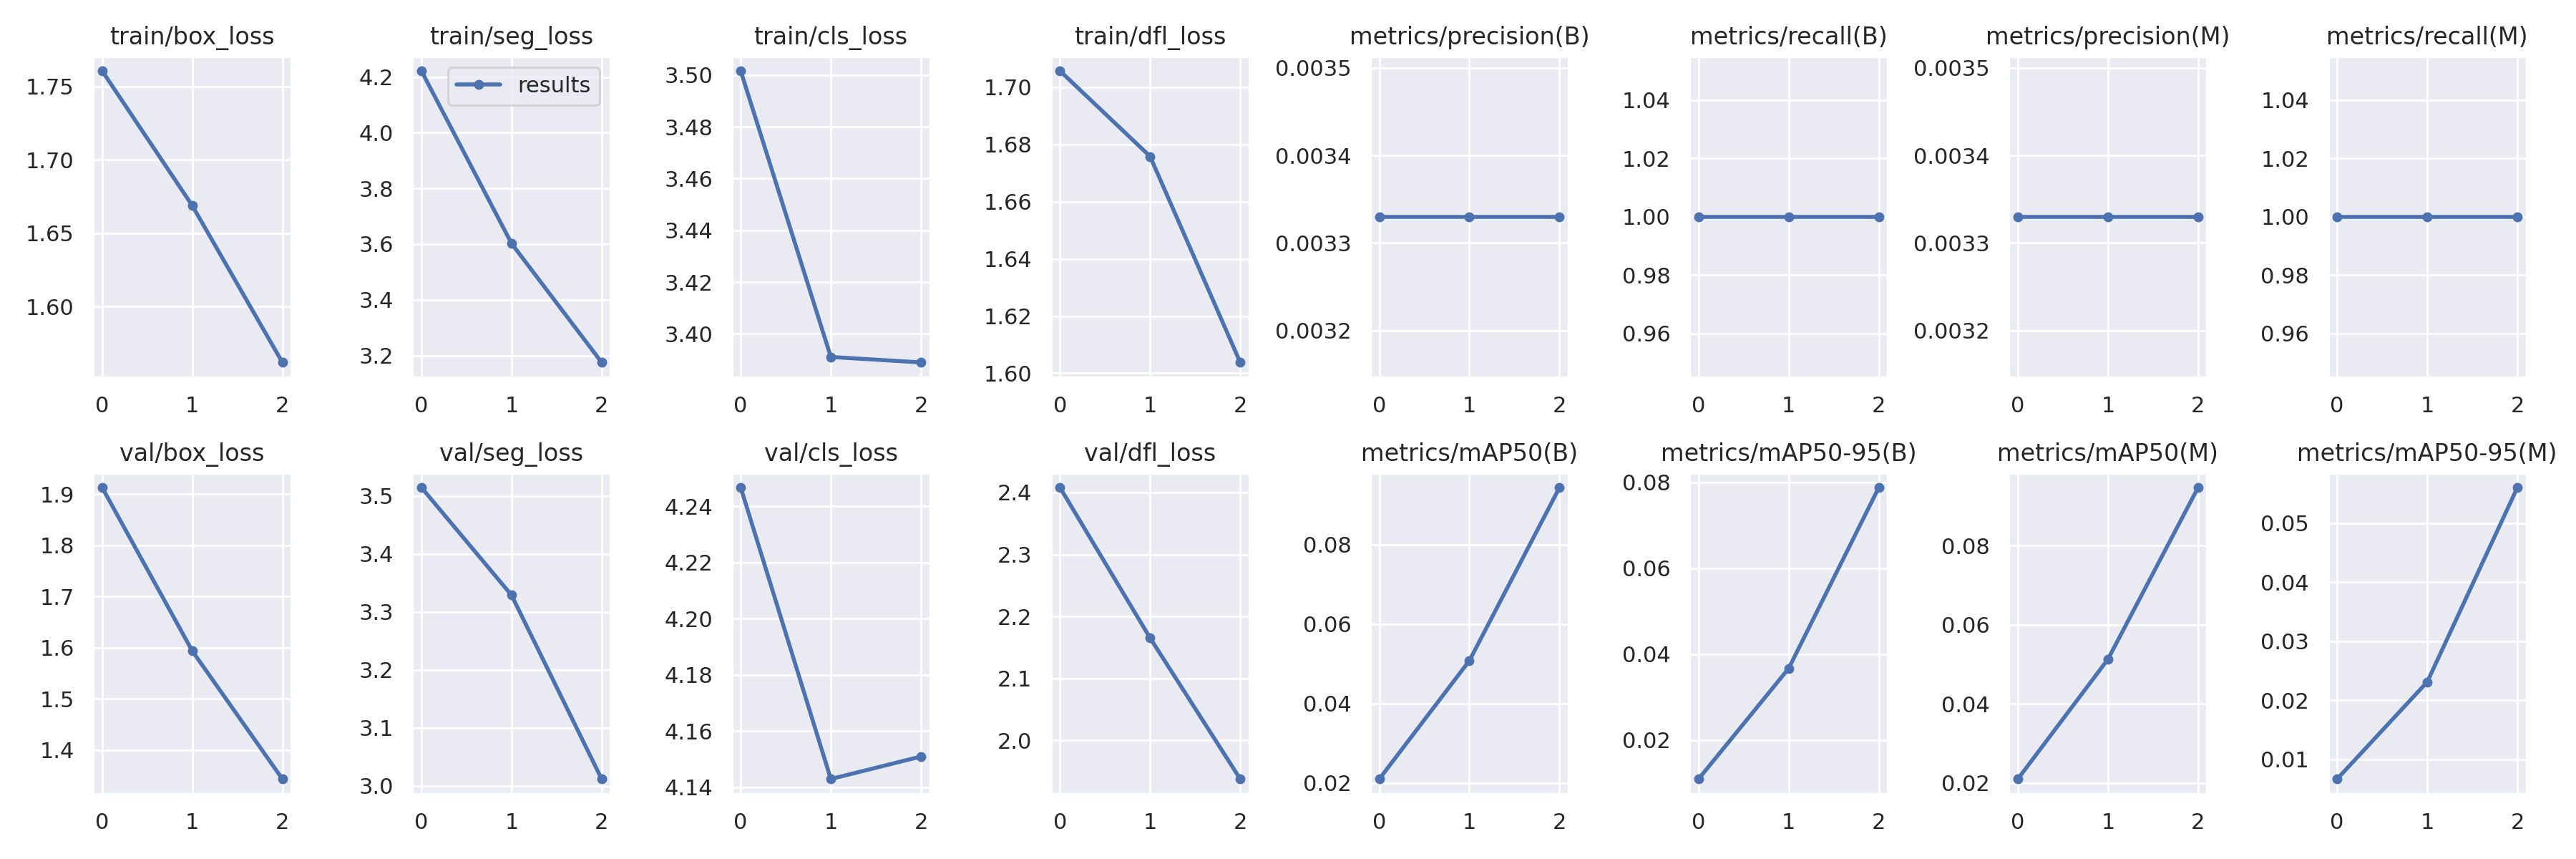

In [10]:
display(train_result)